Data Latih (train.csv)
   user_id  product_id                              product_name  rating  \
0     1813      154533                           Beautiful Thing       5   
1     1944      192838                             Almost Famous       5   
2      534      202590                        A Clockwork Orange       5   
3     1811      140456  Great Expectations (Wordsworth Classics)       4   
4      102      154278                                Phenomenon       5   

   votes  helpful_votes  ID  
0     10              8   0  
1      4              2   1  
2      5              5   2  
3      1              0   3  
4      0              0   4  

 TRAIN INFO 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745889 entries, 0 to 745888
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        745889 non-null  int64 
 1   product_id     745889 non-null  int64 
 2   product_name   745889 non-null  obj

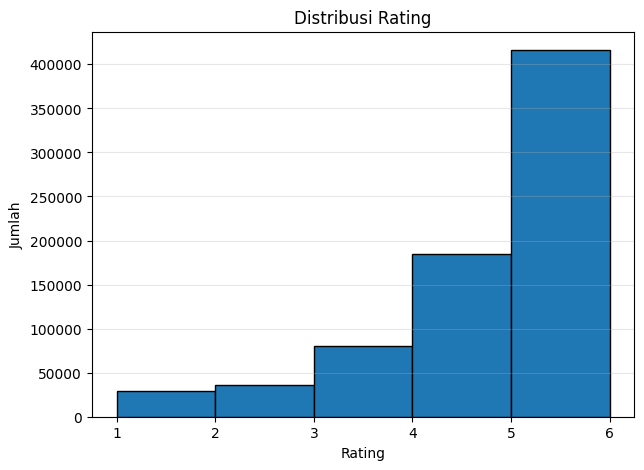

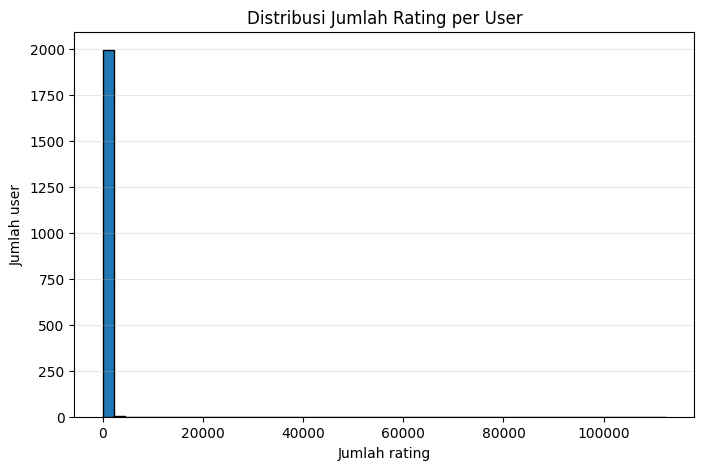

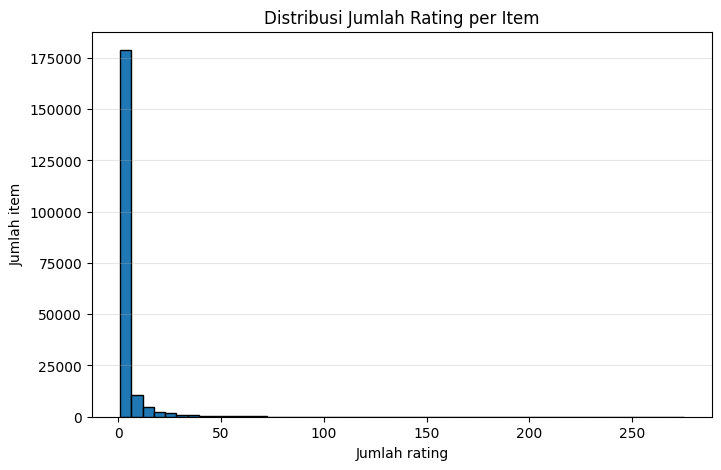


 MISSING VALUES 
user_id          0
product_id       0
product_name     0
rating           0
votes            0
helpful_votes    0
ID               0
dtype: int64


In [ ]:
from lightgbm import train
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train_path = r"C:\Semester 7 Gass\SisRek\Proyek Sisrek\train.csv"
test_path = r"C:\Semester 7 Gass\SisRek\Proyek Sisrek\test.csv"

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)



print("Data Latih (train.csv)")
print(df_train.head())

print("\n TRAIN INFO ")
print(df_train.info())

print("Data Tes (test.csv)")
print(df_test.head())




train = df_train
total_rows = len(train)
unique_users = train["user_id"].nunique()
unique_items = train["product_id"].nunique()

print("\n STATISTIK DASAR ")
print(f"Total rating: {total_rows}")
print(f"Unique users: {unique_users}")
print(f"Unique items: {unique_items}")



rating_dist = train["rating"].value_counts().sort_index()
print("\n DISTRIBUSI RATING")
print(rating_dist)

plt.figure(figsize=(7,5))
plt.hist(train["rating"], bins=[1,2,3,4,5,6], edgecolor='black')
plt.title("Distribusi Rating")
plt.xlabel("Rating")
plt.ylabel("Jumlah")
plt.grid(axis='y', alpha=0.3)
plt.show()

ratings_per_user = train.groupby("user_id")["rating"].count()

plt.figure(figsize=(8,5))
plt.hist(ratings_per_user, bins=50, edgecolor='black')
plt.title("Distribusi Jumlah Rating per User")
plt.xlabel("Jumlah rating")
plt.ylabel("Jumlah user")
plt.grid(axis='y', alpha=0.3)
plt.show()


ratings_per_item = train.groupby("product_id")["rating"].count()

plt.figure(figsize=(8,5))
plt.hist(ratings_per_item, bins=50, edgecolor='black')
plt.title("Distribusi Jumlah Rating per Item")
plt.xlabel("Jumlah rating")
plt.ylabel("Jumlah item")
plt.grid(axis='y', alpha=0.3)
plt.show()


print("\n MISSING VALUES ")
print(train.isnull().sum())


In [7]:
n_users = train["user_id"].nunique()
n_items = train["product_id"].nunique()

# Total possible interactions
total_possible = n_users * n_items

# Total rating yang tersedia
total_ratings = len(train)

# Hitung sparsity
sparsity = 1 - (total_ratings / total_possible)

print(" SPARSITY DATASET ")
print(f"Jumlah User   : {n_users}")
print(f"Jumlah Item   : {n_items}")
print(f"Total Rating  : {total_ratings:,}")
print(f"Max Possible  : {total_possible:,}")
print(f"Sparsity (%)  : {sparsity * 100:.4f}% (sangat tinggi)")

 SPARSITY DATASET 
Jumlah User   : 2000
Jumlah Item   : 201325
Total Rating  : 745,889
Max Possible  : 402,650,000
Sparsity (%)  : 99.8148% (sangat tinggi)


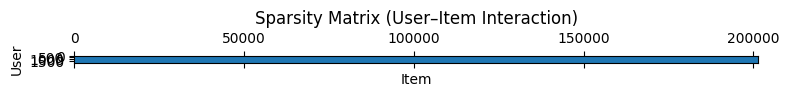

In [9]:
import scipy.sparse as sp
# Buat mapping user dan item ke index 0..N
user_index = {u: i for i, u in enumerate(train["user_id"].unique())}
item_index = {i: j for j, i in enumerate(train["product_id"].unique())}

# Buat sparse matrix CSR
rows = train["user_id"].map(user_index)
cols = train["product_id"].map(item_index)
data = np.ones(len(train))

sparse_matrix = sp.csr_matrix((data, (rows, cols)), shape=(n_users, n_items))

# Visualisasi spy plot
plt.figure(figsize=(8,8))
plt.spy(sparse_matrix, markersize=0.5)
plt.title("Sparsity Matrix (User–Item Interaction)")
plt.xlabel("Item")
plt.ylabel("User")
plt.tight_layout()
plt.show()

 10 User dengan Rating Terbanyak 
user_id
1916    112483
1502     28404
70        7530
874       4855
1716      4260
1609      3437
310       2754
1358      1778
1920      1759
530       1706
Name: rating, dtype: int64


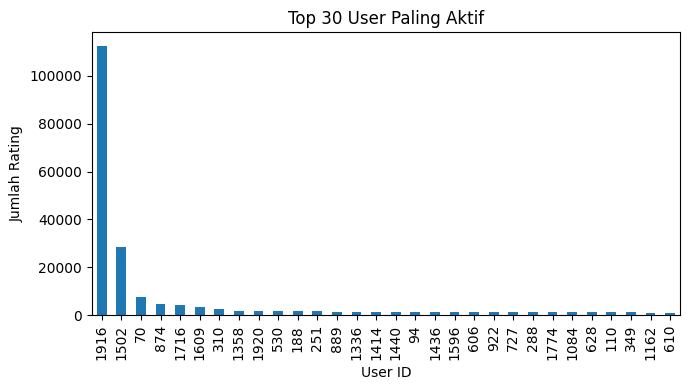

In [11]:
ratings_per_user = train.groupby("user_id")["rating"].count().sort_values(ascending=False)

print(" 10 User dengan Rating Terbanyak ")
print(ratings_per_user.head(10))

# Grafik
plt.figure(figsize=(7,4))
ratings_per_user.head(30).plot(kind='bar')
plt.title("Top 30 User Paling Aktif")
plt.xlabel("User ID")
plt.ylabel("Jumlah Rating")
plt.tight_layout()
plt.show()

 10 Item dengan Rating Terbanyak 
product_id
212937    275
212359    267
192681    255
213993    253
212370    251
213812    250
81770     201
91599     200
212581    200
91589     199
Name: rating, dtype: int64


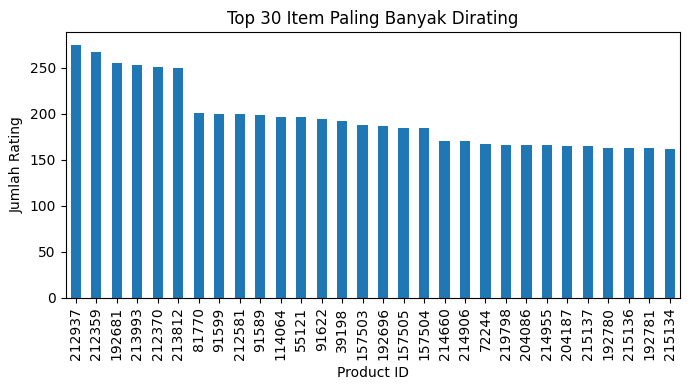

In [12]:
ratings_per_item = train.groupby("product_id")["rating"].count().sort_values(ascending=False)

print(" 10 Item dengan Rating Terbanyak ")
print(ratings_per_item.head(10))

# Grafik
plt.figure(figsize=(7,4))
ratings_per_item.head(30).plot(kind='bar')
plt.title("Top 30 Item Paling Banyak Dirating")
plt.xlabel("Product ID")
plt.ylabel("Jumlah Rating")
plt.tight_layout()
plt.show()


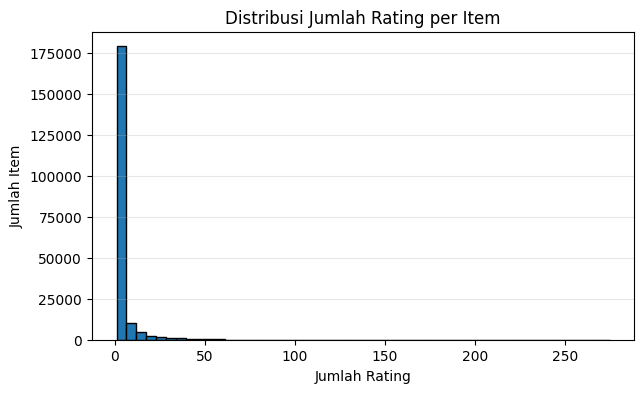

In [13]:
plt.figure(figsize=(7,4))
plt.hist(ratings_per_item, bins=50, edgecolor='black')
plt.title("Distribusi Jumlah Rating per Item")
plt.xlabel("Jumlah Rating")
plt.ylabel("Jumlah Item")
plt.grid(axis='y', alpha=0.3)
plt.show()
